This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
CarND-LaneLines-P1/output_images/solidWhiteCurve.jpg
This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
CarND-LaneLines-P1/output_images/solidWhiteRight.jpg
This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
CarND-LaneLines-P1/output_images/solidYellowCurve.jpg
This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
CarND-LaneLines-P1/output_images/solidYellowCurve2.jpg
This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
CarND-LaneLines-P1/output_images/solidYellowLeft.jpg
This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)
CarND-LaneLines-P1/output_images/whiteCarLaneSwitch.jpg


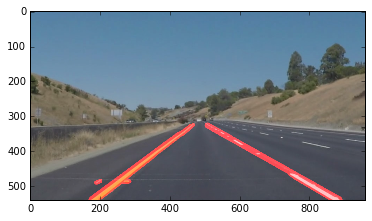

In [94]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

#reading in an image
import os
list=os.listdir("CarND-LaneLines-P1/test_images/")
for i in range(0,len(list)):
    name_image=list[i]
    image_path="CarND-LaneLines-P1/test_images/"+name_image
    image = mpimg.imread(image_path)
    #printing out some stats and plotting
    print('This image is:', type(image), 'with dimesions:', image.shape)
    plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

    gray = grayscale(image)
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = gaussian_blur(gray, kernel_size)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = canny(blur_gray, low_threshold, high_threshold)

    imshape = image.shape
    x_right = 450
    y_right = 330
    x_left = 490
    y_left = 320
    vertices = np.array([[(0,imshape[0]),(x_right, y_right), (x_left, y_left), (imshape[1],imshape[0])]], dtype=np.int32)
    masked_edges=region_of_interest(edges,vertices)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 15     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 13 #minimum number of pixels making up a line
    max_line_gap = 20    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
    #lines = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on a blank image
#for line in lines:
 #   for x1,y1,x2,y2 in line:      
#      cv2.line(line_image,(x1,y1),(x2,y2),(180,0,0),10)

    coord=np.zeros((len(lines)*2,2))
    i=0
    for line in lines:
        for x1,y1,x2,y2 in line:  
            #print(x1,y1,x2,y2)
            cv2.line(line_image,(x1,y1),(x2,y2),(180,0,0),10)
            coord[i]=np.matrix([x1,y1])
            i+=1
            coord[i]=np.matrix([x2,y2])
            i+=1
    #print(coord)
    coord_sort=coord[np.lexsort(np.fliplr(coord).T)]
    x_r=int(coord_sort[0][0])
    y_r=int(coord_sort[0][1])
    x_l=int(coord_sort[-1][0])
    y_l=int(coord_sort[-1][1])

    needle = x_right
    item_index = -1
    for row in coord_sort:
        if row[0] <= needle:
            item_index +=1
        else:
            break
    x_r_end=int(coord_sort[item_index-1][0])
    y_r_end=int(coord_sort[item_index-1][1])

    needle = x_left
    item_index = -1
    for row in coord_sort:
        if row[0] <= needle:
            item_index +=1
        else:  
            break        
    x_l_end=int(coord_sort[item_index+1][0])
    y_l_end=int(coord_sort[item_index+1][1])

    cv2.line(line_image,(x_r,y_r),(x_r_end,y_r_end),(180,0,0),15) 
    cv2.line(line_image,(x_l,y_l),(x_l_end,y_l_end),(180,0,0),15)

    # Draw the lines on the original image
    lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0) 
    plt.imshow(lines_edges)
    save_path="CarND-LaneLines-P1/output_images/"+name_image
    print(save_path)
    plt.savefig(save_path)

### Reflections
In this project I've used different tools for lane recognitions, such as: color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection. The goal was to piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display.


The results are pretty good for situations when lanes are easily detected, no shadows or other vehicles obstracting them. To make the pipeline more robust to any type of disturbances, other techniques can be applied techniques (combinations of gradients, different color channels etc). Major improvements can be done in the area of removing noise in the edge detection.

Also, in the current approach, the region of intererest is in a certain fixed area in the image, and we assume it covers the two lane lines and mostly only two lane lines. This can be changes in a more dynamic way for detection.